# Experiment 3: Grayscale Image Enhancement

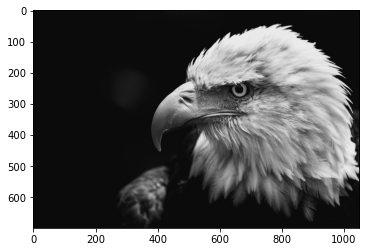

In [8]:
# Importing Required Libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt
  
# Open the image. 
img = cv2.imread('C:/Users/psvis/OneDrive/Pictures/Saved pictures/Eagle.jpg') 
  
# Display the output. 
src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

## Log Transformation Of An Image

C:\Users\psvis\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


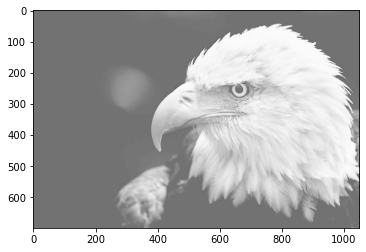

In [25]:
# Apply log transform. 
c = 255/(np.log(1 + np.max(img))) 
log_transformed = c * np.log(1 + img) 
  
# Specify the data type. 
log_transformed = np.array(log_transformed, dtype = np.uint8) 
  
# Display the output. 
src = cv2.cvtColor(log_transformed, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

## Gamma Correction Of An Image

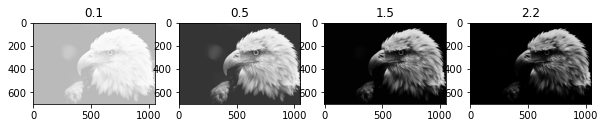

In [23]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# Trying 4 gamma values.  
      
# Apply gamma correction. 
gamma_corrected = np.array(255*(img / 255) ** 0.1, dtype = 'uint8')
src1 = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

gamma_corrected = np.array(255*(img / 255) ** 0.5, dtype = 'uint8')    
src2 = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)    

gamma_corrected = np.array(255*(img / 255) ** 1.5, dtype = 'uint8')    
src3 = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

gamma_corrected = np.array(255*(img / 255) ** 2.2, dtype = 'uint8')    
src4 = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

ax1.title.set_text('0.1')
ax1.imshow(src1)

ax2.title.set_text('0.5')
ax2.imshow(src2)

ax3.title.set_text('1.5')
ax3.imshow(src3)

ax4.title.set_text('2.2')
ax4.imshow(src4)

plt.show()

## Negative Of An Image

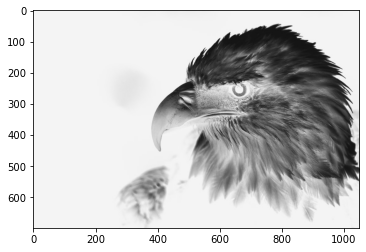

In [22]:
#Negative of an Image
# Subtract the img from max value(calculated from dtype)
img_neg = 255 - img

# Display the output. 
src = cv2.cvtColor(img_neg, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.show()

## Threshold Of An Image

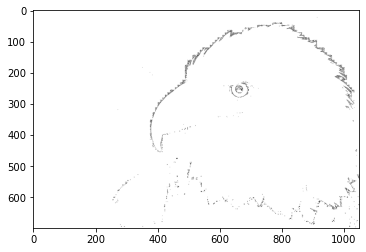

In [21]:
# Applying Binary Thresholding  
# All pixels value above 120 will  
# be set to 255 
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
plt.imshow(threshold)
plt.show()

## Contrast Stretching


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


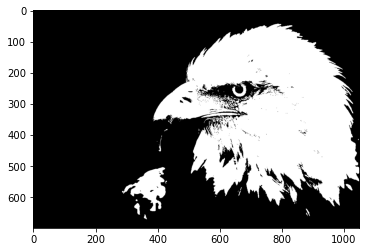

In [30]:
# Parameters
r1, s1 = 70, 0
r2, s2 = 140, 255

src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Perform Contrast Stretching
pixels = src.ravel()
cs = []
for pixel in pixels:
    if pixel >= 0 and pixel <= r1:
        new_pixel = (s1 / r1) * pixel
    elif pixel > r1 and pixel <= r2:
        new_pixel = ((s2 - s1)/(r2 - r1)) * (pixel - r1) + s1
    else:
        new_pixel = ((255 - s2)/(255 - r2)) * (pixel - r2) + s2 
    cs.append(new_pixel)

contrast_stretched = np.array(cs)
contrast_stretched = contrast_stretched.reshape(src.shape)

plt.imshow(contrast_stretched)
plt.show()


## Intensity Level Slicing

In [29]:
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
row, column = src.shape
img1 = np.zeros((row,column),dtype = 'uint8')
min_range = 10
max_range = 60
for i in range(row):
    for j in range(column):
        if src[i,j]>min_range and src[i,j]<max_range:
            img1[i,j] = 255
        else:
            img1[i,j] = 0

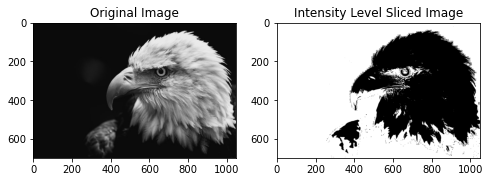

In [31]:
# Displaying Results
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.imshow(src, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(img1, cmap='gray')
ax2.title.set_text(f'Intensity Level Sliced Image')
plt.show()